### 목적: 각 csv 파일들이 어떤 정보를 가지고 있는지 확인

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm
from scipy.stats import chi2_contingency

In [3]:
file_path = "./dataset_new/"

---

## 1. Dealer Hierarchies.csv
- 가게 정보
- `Store`: 가게 unique ID
- `Store Owner`: 가게 주인, 한명이 여러개의 가게 가질 수 있음
- `Region Level`: 지역, level1 < level2
- `Urban/Rural`: metropolitan or outside of a larger metro area

In [4]:
dealer_hierarchies = pd.read_csv(f"{file_path}Dealer Hierarchies.csv", encoding="cp949")
dealer_hierarchies

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural
0,1,1,Eisenstadt-Umgebung,GWR,Urban
1,2,1,Politischer Bezirk G?ssing,GWR,Urban
2,3,1,Politischer Bezirk Jennersdorf,GWR,Urban
3,4,1,Politischer Bezirk Jennersdorf,GWR,Urban
4,5,1,Politischer Bezirk Oberpullendorf,GWR,Urban
...,...,...,...,...,...
637,638,132,Graz Stadt,MMJ,Rural
638,639,300,Politischer Bezirk Eferding,ICA,Rural
639,640,301,Bene?ov,UQM,Rural
640,641,4,Nivala-Haapaj?rvi,IRA,Urban


### 1) Data 오류 확인

In [5]:
# 결측값 확인
dealer_hierarchies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store           642 non-null    int64 
 1   Store Owner     642 non-null    int64 
 2   Region Level 1  642 non-null    object
 3   Region Level 2  642 non-null    object
 4   Urban/Rural     642 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.2+ KB


In [6]:
# 중복 확인
dealer_hierarchies[dealer_hierarchies.duplicated(keep=False)]

,Store,Store Owner,Region Level 1,Region Level 2,Urban/Rural


### 2) 기본 Data 확인

### Store owner는 몇명인가?
- 301명
- 1~301까지 존재

In [7]:
print(len(set(dealer_hierarchies["Store Owner"])))
print(set(dealer_hierarchies["Store Owner"]))

301
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

### Store owner가 각각 가진 가게의 수
- 최대 14개
- 최소 = 중앙값 = 1개

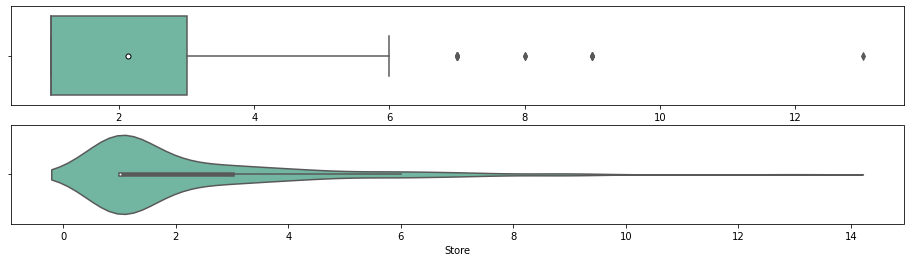

In [8]:
store_owner_count = dealer_hierarchies.groupby(["Store Owner"]).count()[["Store"]]
fig, ax = plt.subplots(figsize=(16, 4), nrows=2)
sns.boxplot(
    data=store_owner_count,
    x="Store",
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": "5",
    },
    palette="Set2",
    ax=ax[0],
)
sns.violinplot(data=store_owner_count, x="Store", palette="Set2", ax=ax[1]);

### Urban/Rural


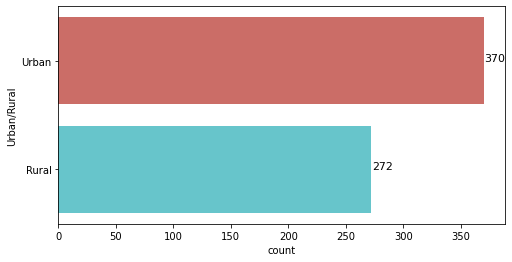

In [9]:
countplt, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="Urban/Rural", data=dealer_hierarchies, palette="hls")
for rect in ax.patches:
    ax.text(
        rect.get_width() + 10,
        rect.get_y() + rect.get_height() / 2,
        rect.get_width(),
        horizontalalignment="center",
        fontsize=11,
    )

---

## 2. Product Hierarchies.csv + 3. Profit per Product.csv

### 1) Data 합치기

In [10]:
product_hierarchies = pd.read_csv(f"{file_path}Product Hierarchies.csv", encoding="cp949")
product_hierarchies

,Product Type,Item
0,Electronics,Power Cord
1,Electronics,Phone Charger
2,Electronics,Ear Buds
3,Electronics,Mouse
4,Electronics,Keyboard
5,Grocery,Milk
6,Grocery,Eggs
7,Grocery,Cereal
8,Grocery,Shrimp
9,Grocery,Noodles


In [11]:
profit_per_product = pd.read_csv(f"{file_path}Profit per Product.csv", encoding="cp949")
profit_per_product = profit_per_product[["Item", "Profit"]][:18]  # null값 제거
profit_per_product

,Item,Profit
0,Power Cord,$13.74
1,Phone Charger,$14.33
2,Ear Buds,$14.30
3,Mouse,$19.47
4,Keyboard,$22.48
5,Milk,$4.80
6,Eggs,$7.98
7,Cereal,$8.58
8,Shrimp,$14.94
9,Noodles,$13.96


In [12]:
# product_hierarchies + profit_per_product
product_hierarchis_profit = product_hierarchies[product_hierarchies["Item"] == profit_per_product["Item"]]  # 순서 같나 확인
product_hierarchis_profit["Profit"] = profit_per_product["Profit"]

# 나중에 사용하기 위하여 금액을 float로 나타낸다
for i in range(len(product_hierarchis_profit)):
    product_hierarchis_profit.loc[i]["Profit"] = product_hierarchis_profit.loc[i]["Profit"][1:]

product_hierarchis_profit = product_hierarchis_profit.astype({"Profit": "float"})

product_hierarchis_profit

,Product Type,Item,Profit
0,Electronics,Power Cord,13.74
1,Electronics,Phone Charger,14.33
2,Electronics,Ear Buds,14.30
3,Electronics,Mouse,19.47
4,Electronics,Keyboard,22.48
5,Grocery,Milk,4.80
6,Grocery,Eggs,7.98
7,Grocery,Cereal,8.58
8,Grocery,Shrimp,14.94
9,Grocery,Noodles,13.96


In [13]:
# float64로 나타나는 것 확인
product_hierarchis_profit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Type  18 non-null     object 
 1   Item          18 non-null     object 
 2   Profit        18 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [14]:
# 저장
# product_hierarchis_profit.to_csv(f'{file_path}Product_Hierarchies_Profit.csv',index=False)
# 열리는 것 확인
# test = pd.read_csv(f"{file_path}Product_Hierarchies_Profit.csv", encoding="cp949")

---

## 4. industry Data (★)
- 과거에 allocation 했던 상품들에 대한 판매량

In [15]:
retail_data = pd.read_csv(f"{file_path}Retail data.csv", encoding="cp949")
retail_data

,Month,Sales Total,Store,Product Type,Item
0,2021-02-01 00:00:00,1,1,Electronics,Phone Charger
1,2021-02-01 00:00:00,5,1,Grocery,Shrimp
2,2021-02-01 00:00:00,2,1,Grocery,Noodles
3,2021-02-01 00:00:00,1,1,Grocery,King Crab
4,2021-03-01 00:00:00,1,1,Electronics,Ear Buds
...,...,...,...,...,...
125221,2021-07-01 00:00:00,1,642,Electronics,Ear Buds
125222,2021-08-01 00:00:00,0,642,Electronics,Power Cord
125223,2021-09-01 00:00:00,0,642,Home Goods,Nails
125224,2022-02-01 00:00:00,1,642,Electronics,Keyboard


### 1) Data 오류 확인

In [16]:
# 결측값 확인
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Month         125226 non-null  object
 1   Sales Total   125226 non-null  int64 
 2   Store         125226 non-null  int64 
 3   Product Type  125226 non-null  object
 4   Item          125226 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.8+ MB


In [17]:
# 중복 확인
retail_data[retail_data.duplicated(keep=False)]

,Month,Sales Total,Store,Product Type,Item


### 2) 월별 분리
- Month가 datetime 형식으로 되어있는데, 이를 필요한 데이터만 얻기 위하여 분리

In [18]:
# datetime 형변환
retail_data["Month"] = pd.to_datetime(retail_data["Month"], format="%Y-%m-%d %H:%M:%S")

# 열 이름 변경
retail_data.rename(columns={"Month": "Datetime"}, inplace=True)
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125226 entries, 0 to 125225
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Datetime      125226 non-null  datetime64[ns]
 1   Sales Total   125226 non-null  int64         
 2   Store         125226 non-null  int64         
 3   Product Type  125226 non-null  object        
 4   Item          125226 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.8+ MB


In [19]:
retail_data["Year"] = retail_data["Datetime"].dt.year
retail_data["Month"] = retail_data["Datetime"].dt.month
retail_data["Day"] = retail_data["Datetime"].dt.day
retail_data["Time"] = retail_data["Datetime"].dt.time
retail_data

,Datetime,Sales Total,Store,Product Type,Item,Year,Month,Day,Time
0,2021-02-01,1,1,Electronics,Phone Charger,2021,2,1,00:00:00
1,2021-02-01,5,1,Grocery,Shrimp,2021,2,1,00:00:00
2,2021-02-01,2,1,Grocery,Noodles,2021,2,1,00:00:00
3,2021-02-01,1,1,Grocery,King Crab,2021,2,1,00:00:00
4,2021-03-01,1,1,Electronics,Ear Buds,2021,3,1,00:00:00
...,...,...,...,...,...,...,...,...,...
125221,2021-07-01,1,642,Electronics,Ear Buds,2021,7,1,00:00:00
125222,2021-08-01,0,642,Electronics,Power Cord,2021,8,1,00:00:00
125223,2021-09-01,0,642,Home Goods,Nails,2021,9,1,00:00:00
125224,2022-02-01,1,642,Electronics,Keyboard,2022,2,1,00:00:00


In [20]:
print(retail_data["Time"].value_counts())
print(retail_data["Day"].value_counts())

00:00:00    125226
Name: Time, dtype: int64
1    125226
Name: Day, dtype: int64


- day와 time은 필요 없는 값 (1일과 0시만 존재)
- Year, month만 선택해서 datetime을 만들 때 기본 1일 0시로 들어가게 된다

In [21]:
# column 선택
retail_data = retail_data[["Sales Total", "Store", "Product Type", "Item", "Year", "Month", "Datetime"]]
retail_data

,Sales Total,Store,Product Type,Item,Year,Month,Datetime
0,1,1,Electronics,Phone Charger,2021,2,2021-02-01
1,5,1,Grocery,Shrimp,2021,2,2021-02-01
2,2,1,Grocery,Noodles,2021,2,2021-02-01
3,1,1,Grocery,King Crab,2021,2,2021-02-01
4,1,1,Electronics,Ear Buds,2021,3,2021-03-01
...,...,...,...,...,...,...,...
125221,1,642,Electronics,Ear Buds,2021,7,2021-07-01
125222,0,642,Electronics,Power Cord,2021,8,2021-08-01
125223,0,642,Home Goods,Nails,2021,9,2021-09-01
125224,1,642,Electronics,Keyboard,2022,2,2022-02-01


### 3) Store 정보 추가
- retail_data에 Store 정보를 추가한다

In [40]:
# region_lv1 = []
# region_lv2 = []
# urban_rural = []

# for i in tqdm(range(len(retail_data))):
#     store_num = retail_data.loc[i]["Store"]
#     idx = store_num - 1
#     region_lv1.append(dealer_hierarchies.loc[idx]["Region Level 1"])
#     region_lv2.append(dealer_hierarchies.loc[idx]["Region Level 2"])
#     urban_rural.append(dealer_hierarchies.loc[idx]["Urban/Rural"])

100%|██████████| 125226/125226 [00:52<00:00, 2389.09it/s]


In [41]:
# retail_data["Region Level 1"] = region_lv1
# retail_data["Region Level 2"] = region_lv2
# retail_data["Urban/Rural"] = urban_rural
# retail_data

,Sales Total,Store,Product Type,Item,Year,Month,Datetime,Region Level 1,Region Level 2,Urban/Rural
0,1,1,Electronics,Phone Charger,2021,2,2021-02-01,Eisenstadt-Umgebung,GWR,Urban
1,5,1,Grocery,Shrimp,2021,2,2021-02-01,Eisenstadt-Umgebung,GWR,Urban
2,2,1,Grocery,Noodles,2021,2,2021-02-01,Eisenstadt-Umgebung,GWR,Urban
3,1,1,Grocery,King Crab,2021,2,2021-02-01,Eisenstadt-Umgebung,GWR,Urban
4,1,1,Electronics,Ear Buds,2021,3,2021-03-01,Eisenstadt-Umgebung,GWR,Urban
...,...,...,...,...,...,...,...,...,...,...
125221,1,642,Electronics,Ear Buds,2021,7,2021-07-01,Koillismaa,KTR,Urban
125222,0,642,Electronics,Power Cord,2021,8,2021-08-01,Koillismaa,KTR,Urban
125223,0,642,Home Goods,Nails,2021,9,2021-09-01,Koillismaa,KTR,Urban
125224,1,642,Electronics,Keyboard,2022,2,2022-02-01,Koillismaa,KTR,Urban


In [122]:
retail_data = pd.read_csv(f"{file_path}Retail_data_add_region.csv",encoding="cp949")

In [24]:
# retail_data.to_csv(f"{file_path}Retail_data_add_region.csv", index=False)

### 4) Product - Date

In [125]:
# # Sales total을 고려해야하기 때문에 crosstab 사용시 Dataframe의 수정이 필요하다
# retail_data_to_total = {"Product Type":[],"Item":[],"Year":[],"Month":[],"Datetime":[],"Region Level 1":[],"Region Level 2":[],"Urban/Rural":[]}
# for i in tqdm(range(len(retail_data))):
#     for j in range(retail_data.loc[i]['Sales Total']):
#         retail_data_to_total["Product Type"].append(retail_data.loc[i]['Product Type'])
#         retail_data_to_total["Item"].append(retail_data.loc[i]['Item'])
#         retail_data_to_total["Year"].append(retail_data.loc[i]['Year'])
#         retail_data_to_total["Month"].append(retail_data.loc[i]['Month'])
#         retail_data_to_total["Datetime"].append(retail_data.loc[i]['Datetime'])
#         retail_data_to_total["Region Level 1"].append(retail_data.loc[i]['Region Level 1'])
#         retail_data_to_total["Region Level 2"].append(retail_data.loc[i]['Region Level 2'])
#         retail_data_to_total["Urban/Rural"].append(retail_data.loc[i]['Urban/Rural'])

# retail_data_to_total_df = pd.DataFrame(retail_data_to_total)

100%|██████████| 125226/125226 [02:27<00:00, 848.94it/s] 


In [133]:
# retail_data_to_total_df.to_csv(f"{file_path}retail_data_to_total_df.csv", index=False)
retail_data_to_total_df = pd.read_csv(f"{file_path}retail_data_to_total_df.csv")

In [135]:
retail_date_product_type = pd.crosstab(retail_data_to_total_df['Datetime'],retail_data_to_total_df['Product Type'])#,margins=True)
retail_date_product_type

Product Type,Electronics,Grocery,Home Goods
Datetime,,,
2015-01-01,328,137,573
2015-02-01,423,160,584
2015-03-01,549,283,630
2015-04-01,629,315,636
2015-05-01,696,277,638
...,...,...,...
2021-11-01,1348,634,450
2021-12-01,2235,1207,663
2022-01-01,535,309,186


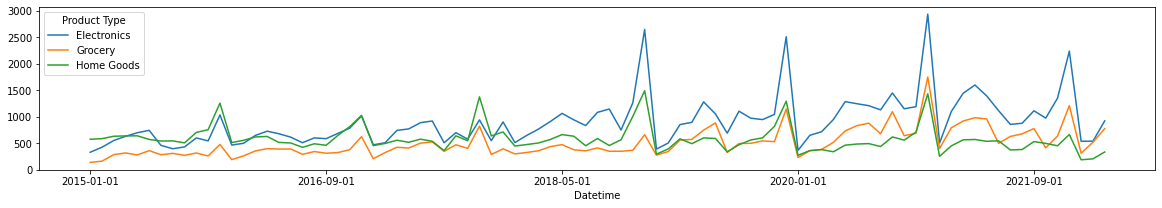

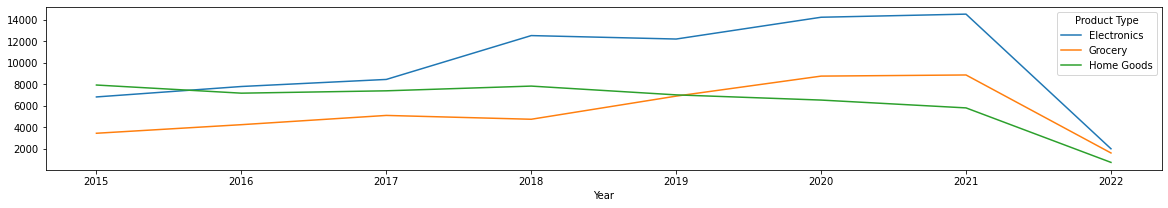

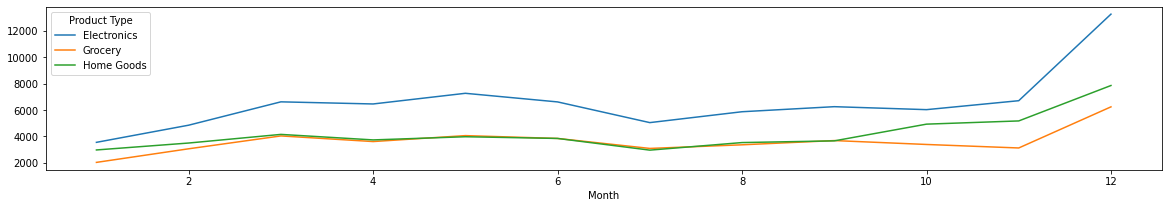

In [143]:
retail_date_product_type.plot(figsize=(20,3))
pd.crosstab(retail_data_to_total_df['Year'],retail_data_to_total_df['Product Type']).plot(figsize=(20,3))
pd.crosstab(retail_data_to_total_df['Month'],retail_data_to_total_df['Product Type']).plot(figsize=(20,3));

- 연말(12월) 소비가 상승한다
- 2022년이 적은 이유는 3월까지밖에 없기 때문

### 5) Product - region

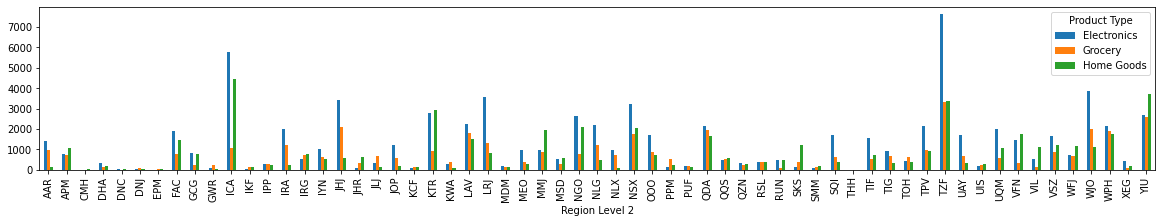

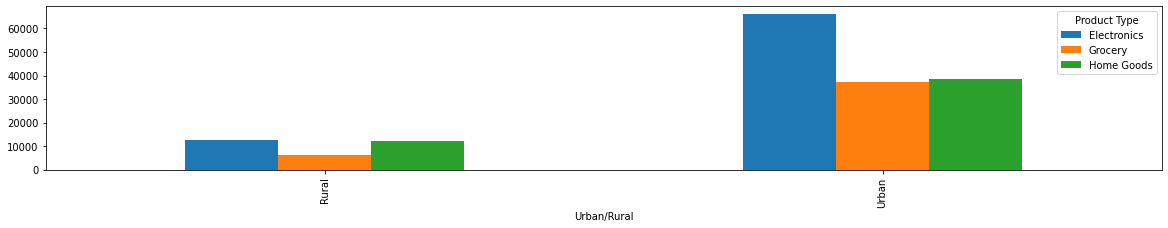

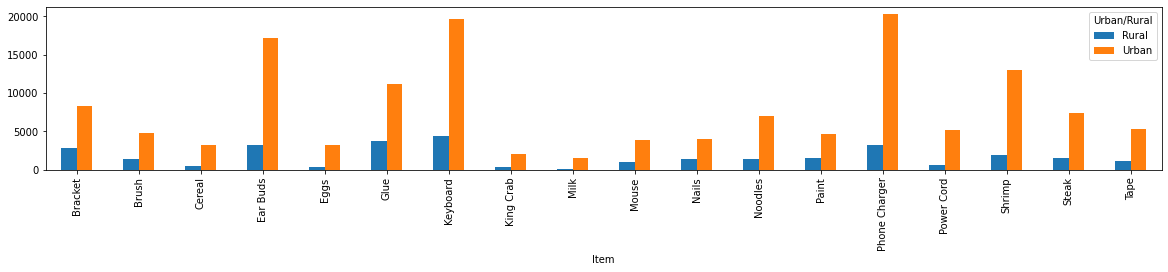

In [162]:
pd.crosstab(retail_data_to_total_df['Region Level 2'],retail_data_to_total_df['Product Type']).plot(kind='bar',figsize=(20,3))
pd.crosstab(retail_data_to_total_df['Urban/Rural'],retail_data_to_total_df['Product Type']).plot(kind='bar',figsize=(20,3))
pd.crosstab(retail_data_to_total_df['Item'],retail_data_to_total_df['Urban/Rural']).plot(kind='bar',figsize=(20,3));




---

## 5. Industry Data (★)
- store별 총 판매 내역 (회사의 과거 allocation과 관계없이 전반적인 시장 상황을 나타내는 Data)

In [25]:
industry_data = pd.read_csv(f"{file_path}Industry data.csv", encoding="cp949")
industry_data

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger
...,...,...,...,...,...
352889,2022-03-01 00:00:00,1,642,Grocery,Noodles
352890,2022-03-01 00:00:00,1,642,Grocery,King Crab
352891,2022-03-01 00:00:00,1,642,Home Goods,Glue
352892,2022-03-01 00:00:00,1,642,Home Goods,Nails


### 1) Data 오류 확인

In [26]:
# 결측값 확인
industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352894 entries, 0 to 352893
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Month          352894 non-null  object
 1   Industry Size  352894 non-null  int64 
 2   Store          352894 non-null  int64 
 3   Product Type   352894 non-null  object
 4   Item           352894 non-null  object
dtypes: int64(2), object(3)
memory usage: 13.5+ MB


In [27]:
# 중복 확인
industry_data[industry_data.duplicated(keep=False)]

,Month,Industry Size,Store,Product Type,Item


### 2) 월별 분리
- Month가 datetime 형식으로 되어있는데, 이를 필요한 데이터만 얻기 위하여 분리

In [28]:
# datetime 형변환
industry_data["Month"] = pd.to_datetime(industry_data["Month"], format="%Y-%m-%d %H:%M:%S")

# 열 이름 변경
industry_data.rename(columns={"Month": "Datetime"}, inplace=True)
industry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352894 entries, 0 to 352893
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Datetime       352894 non-null  datetime64[ns]
 1   Industry Size  352894 non-null  int64         
 2   Store          352894 non-null  int64         
 3   Product Type   352894 non-null  object        
 4   Item           352894 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.5+ MB


In [29]:
industry_data["Year"] = industry_data["Datetime"].dt.year
industry_data["Month"] = industry_data["Datetime"].dt.month
industry_data["Day"] = industry_data["Datetime"].dt.day
industry_data["Time"] = industry_data["Datetime"].dt.time
industry_data

,Datetime,Industry Size,Store,Product Type,Item,Year,Month,Day,Time
0,2015-01-01,2,1,Electronics,Keyboard,2015,1,1,00:00:00
1,2015-01-01,1,1,Grocery,Steak,2015,1,1,00:00:00
2,2015-01-01,1,1,Home Goods,Paint,2015,1,1,00:00:00
3,2015-02-01,1,1,Grocery,Shrimp,2015,2,1,00:00:00
4,2015-03-01,2,1,Electronics,Phone Charger,2015,3,1,00:00:00
...,...,...,...,...,...,...,...,...,...
352889,2022-03-01,1,642,Grocery,Noodles,2022,3,1,00:00:00
352890,2022-03-01,1,642,Grocery,King Crab,2022,3,1,00:00:00
352891,2022-03-01,1,642,Home Goods,Glue,2022,3,1,00:00:00
352892,2022-03-01,1,642,Home Goods,Nails,2022,3,1,00:00:00


In [30]:
print(industry_data["Time"].value_counts())
print(industry_data["Day"].value_counts())

00:00:00    352894
Name: Time, dtype: int64
1    352894
Name: Day, dtype: int64


- day와 time은 필요 없는 값 (1일과 0시만 존재)
- Year, month만 선택해서 datetime을 만들 때 기본 1일 0시로 들어가게 된다

In [31]:
# column 선택
industry_data = industry_data[["Industry Size", "Store", "Product Type", "Item", "Year", "Month", "Datetime"]]
industry_data

,Industry Size,Store,Product Type,Item,Year,Month,Datetime
0,2,1,Electronics,Keyboard,2015,1,2015-01-01
1,1,1,Grocery,Steak,2015,1,2015-01-01
2,1,1,Home Goods,Paint,2015,1,2015-01-01
3,1,1,Grocery,Shrimp,2015,2,2015-02-01
4,2,1,Electronics,Phone Charger,2015,3,2015-03-01
...,...,...,...,...,...,...,...
352889,1,642,Grocery,Noodles,2022,3,2022-03-01
352890,1,642,Grocery,King Crab,2022,3,2022-03-01
352891,1,642,Home Goods,Glue,2022,3,2022-03-01
352892,1,642,Home Goods,Nails,2022,3,2022-03-01


### 3) Store 정보 추가
- industry_data에 Store 정보를 추가한다

In [32]:
# region_lv1 = []
# region_lv2 = []
# urban_rural = []

# for i in tqdm(range(len(industry_data))):
#     store_num = industry_data.loc[i]["Store"]
#     idx = store_num - 1
#     region_lv1.append(dealer_hierarchies.loc[idx]["Region Level 1"])
#     region_lv2.append(dealer_hierarchies.loc[idx]["Region Level 2"])
#     urban_rural.append(dealer_hierarchies.loc[idx]["Urban/Rural"])

100%|██████████| 352894/352894 [02:25<00:00, 2420.93it/s]


In [38]:
# industry_data["Region Level 1"] = region_lv1
# industry_data["Region Level 2"] = region_lv2
# industry_data["Urban/Rural"] = urban_rural
# industry_data

,Industry Size,Store,Product Type,Item,Year,Month,Datetime,Region Level 1,Region Level 2,Urban/Rural
0,2,1,Electronics,Keyboard,2015,1,2015-01-01,Eisenstadt-Umgebung,GWR,Urban
1,1,1,Grocery,Steak,2015,1,2015-01-01,Eisenstadt-Umgebung,GWR,Urban
2,1,1,Home Goods,Paint,2015,1,2015-01-01,Eisenstadt-Umgebung,GWR,Urban
3,1,1,Grocery,Shrimp,2015,2,2015-02-01,Eisenstadt-Umgebung,GWR,Urban
4,2,1,Electronics,Phone Charger,2015,3,2015-03-01,Eisenstadt-Umgebung,GWR,Urban
...,...,...,...,...,...,...,...,...,...,...
352889,1,642,Grocery,Noodles,2022,3,2022-03-01,Koillismaa,KTR,Urban
352890,1,642,Grocery,King Crab,2022,3,2022-03-01,Koillismaa,KTR,Urban
352891,1,642,Home Goods,Glue,2022,3,2022-03-01,Koillismaa,KTR,Urban
352892,1,642,Home Goods,Nails,2022,3,2022-03-01,Koillismaa,KTR,Urban


In [144]:
# industry_data.to_csv(f"{file_path}Industry_data_add_region.csv", index=False)
industry_data = pd.read_csv(f"{file_path}Industry_data_add_region.csv",encoding="cp949")

### 4) Product - Date

In [145]:
# # Sales total을 고려해야하기 때문에 crosstab 사용시 Dataframe의 수정이 필요하다
# industry_data_to_total = {"Product Type":[],"Item":[],"Year":[],"Month":[],"Datetime":[],"Region Level 1":[],"Region Level 2":[],"Urban/Rural":[]}
# for i in tqdm(range(len(industry_data))):
#     for j in range(industry_data.loc[i]['Industry Size']):
#         industry_data_to_total["Product Type"].append(industry_data.loc[i]['Product Type'])
#         industry_data_to_total["Item"].append(industry_data.loc[i]['Item'])
#         industry_data_to_total["Year"].append(industry_data.loc[i]['Year'])
#         industry_data_to_total["Month"].append(industry_data.loc[i]['Month'])
#         industry_data_to_total["Datetime"].append(industry_data.loc[i]['Datetime'])
#         industry_data_to_total["Region Level 1"].append(industry_data.loc[i]['Region Level 1'])
#         industry_data_to_total["Region Level 2"].append(industry_data.loc[i]['Region Level 2'])
#         industry_data_to_total["Urban/Rural"].append(industry_data.loc[i]['Urban/Rural'])

# industry_data_to_total_df = pd.DataFrame(industry_data_to_total)

100%|██████████| 352894/352894 [11:18<00:00, 520.06it/s]


In [148]:
#industry_data_to_total_df.to_csv(f"{file_path}industry_data_to_total_df.csv", index=False)
industry_data_to_total_df = pd.read_csv(f"{file_path}industry_data_to_total_df.csv")

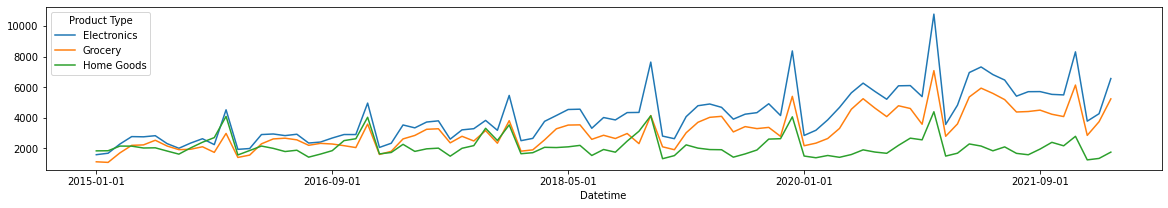

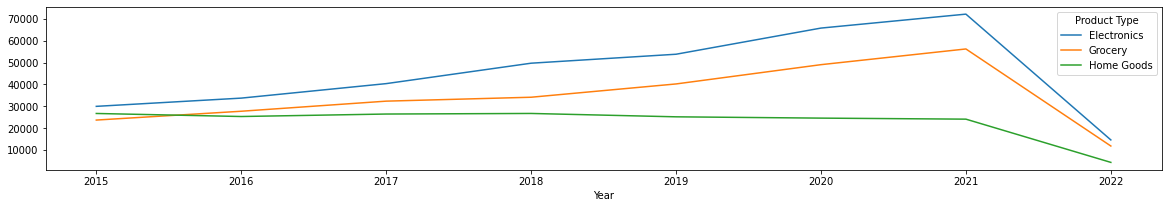

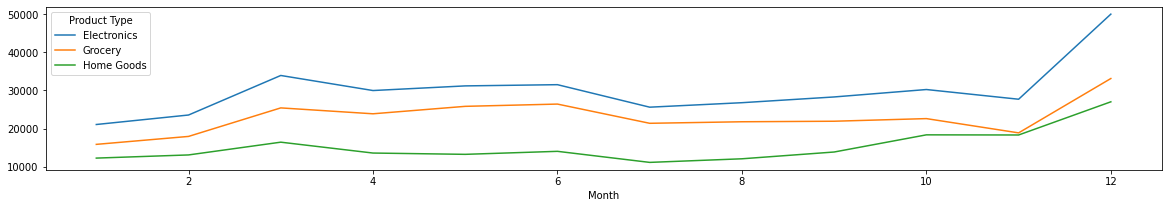

In [149]:
pd.crosstab(industry_data_to_total_df['Datetime'],industry_data_to_total_df['Product Type']).plot(figsize=(20,3))
pd.crosstab(industry_data_to_total_df['Year'],industry_data_to_total_df['Product Type']).plot(figsize=(20,3))
pd.crosstab(industry_data_to_total_df['Month'],industry_data_to_total_df['Product Type']).plot(figsize=(20,3));

- 연말(12월) 소비가 상승한다
- 매년 상승세 보임 -> 2022년에도 상승하지 않을까?
- 2022년이 적은 이유는 3월까지밖에 없기 때문

### 5) Product - region

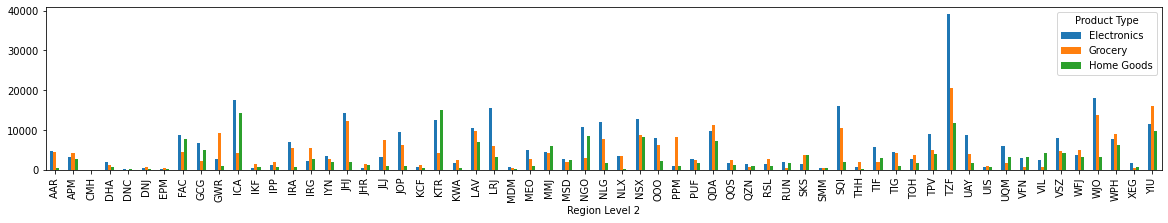

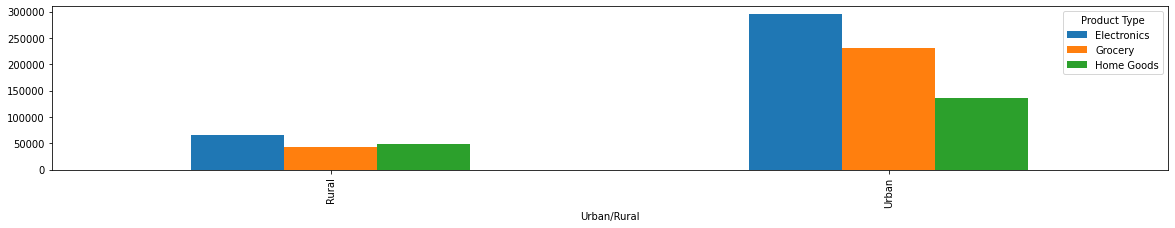

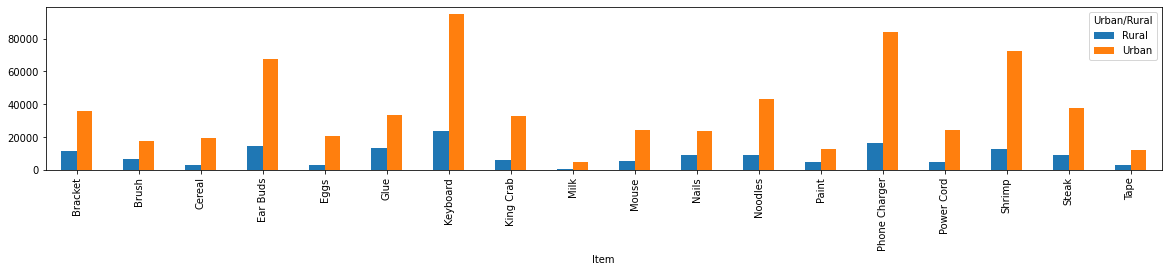

In [163]:
pd.crosstab(industry_data_to_total_df['Region Level 2'],industry_data_to_total_df['Product Type']).plot(kind='bar',figsize=(20,3))
pd.crosstab(industry_data_to_total_df['Urban/Rural'],industry_data_to_total_df['Product Type']).plot(kind='bar',figsize=(20,3))
pd.crosstab(industry_data_to_total_df['Item'],industry_data_to_total_df['Urban/Rural']).plot(kind='bar',figsize=(20,3));




---